In [131]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns



In [132]:
All_School_List = pd.read_csv('Data/All_School_List.csv')
Migrant_School_List = pd.read_csv('Data/Migrant_School_List.csv')
All_School_List.head(1)

,Unnamed: 0,Mean Scale Score,County Name,School Code,District Code,Zip Code,District Name,Total_Students,Per_Student_Spending,Median,Mean,Pop,YearsTeaching,Enrolled,Utilized,Percent_Eligible,Percent_Utilized,Sanctuary
0,0,2674.8,El Dorado,930081,61853,95762,El Dorado Union High,6285.33,11118.34,114420.0,135015.0,38797.0,16.346939,2457,190,0.08,0.07733,0.0


In [133]:
Features_All = All_School_List.drop(['Mean Scale Score','County Name','District Name'],axis=1)

Target_All = All_School_List['Mean Scale Score']>np.percentile(All_School_List['Mean Scale Score'],50)

In [134]:
Features_Migrant = Migrant_School_List.drop(['Mean Scale Score','County Name','District Name'],axis=1)
Target_Migrant = Migrant_School_List['Mean Scale Score']>np.percentile(All_School_List['Mean Scale Score'],50)

**Target is now whether the population of that schools falls above and below the 50th percentile**

In [135]:
#create training and test sets for all students
Train_Features_All,Test_Features_All,Train_Target_All,Test_Target_All = train_test_split(Features_All,Target_All, test_size = .50, random_state=42)

In [136]:
#create training and test sets for migrant students
Train_Features_Migrant,Test_Features_Migrant,Train_Target_Migrant,Test_Target_Migrant = train_test_split(Features_Migrant,Target_Migrant, test_size = .50, random_state=42)

**Now that our data has an apropriate target, it is time use a logistic regression.**

In [137]:
LogReg = LogisticRegression()
LogReg.fit(Train_Features_Migrant,Train_Target_Migrant)
LogReg_Prediction_Migrant = LogReg.predict(Test_Features_Migrant)
Confusion_Matrix = confusion_matrix(Test_Target_Migrant,LogReg_Prediction_Migrant)
print(Confusion_Matrix)

[[23  6]
 [ 7 11]]


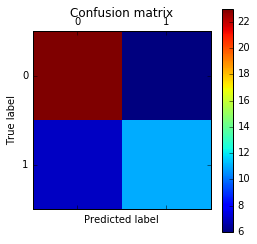

In [138]:
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

** Here the model was able to classify 34 of 47 total schools. In perspective, If the model said that a school did have the makeup to be in the top 50 percentile, that school would be miss classified every one in three times. The rate for false negatives is slightly improved at 1 in 4. **

** Here is one model for predicting student outcomes, use this model with others to crossvalidate **

****
## KNN
** Is there a way to group our schools to give insight into major trends **

In [139]:

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(Train_Features_Migrant, Train_Target_Migrant)

# predict the response
KNN_Prediction_Migrant = knn.predict(Test_Features_Migrant)
Confusion_Matrix = confusion_matrix(Test_Target_Migrant,KNN_Prediction_Migrant)
print(Confusion_Matrix)


[[28  1]
 [ 6 12]]


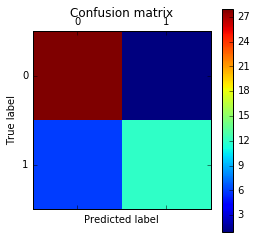

In [140]:
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

** It seems that KNN is resulting in far fewer false positives.**

# L1 Regularization

In [141]:
Lasso_Reg_Migrant = linear_model.Lasso(alpha = 0.1)
Lasso_Reg_Migrant.fit(Train_Features_Migrant,Train_Target_Migrant)
Lasso_Prediction_Migrant = Lasso_Reg_Migrant.predict(Test_Features_Migrant)

print(Lasso_Prediction_Migrant)


[-0.02758438  1.09803169  0.10951113  0.02316216  0.54004995 -0.05339187
  0.3850153   1.15038695  0.05649034  0.28070897  0.0213298   0.15149411
 -0.28155246  0.39190893 -0.31125244  0.46560855  1.29960432 -0.13315806
  1.37689822  0.98258466  0.61738414  1.02499811 -0.09087373  0.11797042
  0.1837567   0.04354302  0.84859213  0.79200994  0.06344133  0.14070989
 -0.09906116  0.90862783  0.49512822  0.29860171 -0.1128488   0.47253409
  0.27892599  0.07613996  0.52365104  0.37343252 -0.06737584  0.33971831
  0.16801746  0.0455329   0.51866535 -0.28657324  0.73352703]


**The prediction needs to be modified so that we can use a confusion matrix to assess the model. currently it is a continuos value but it needs to be a discreet 1 or 0**

[[25  4]
 [ 8 10]]


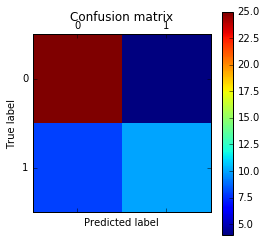

In [142]:
Lasso_Prediction_Migrant = Lasso_Prediction_Migrant>.5
Confusion_Matrix = confusion_matrix(Test_Target_Migrant,Lasso_Prediction_Migrant)
print(Confusion_Matrix)
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

** At present this model is not more effective than our previous KNN solution **

In [145]:
Ridge_Reg_Migrant = linear_model.Ridge(alpha=.5)
Ridge_Reg_Migrant.fit(Train_Features_Migrant,Train_Target_Migrant)
Ridge_Reg_Prediction = Ridge_Reg_Migrant.predict(Test_Features_Migrant)

** this data will also need to be modified before it can used with confusion matrix**

[[25  4]
 [ 8 10]]


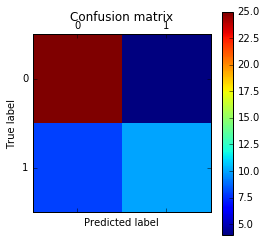

In [146]:
Ridge_Reg_Prediction = Ridge_Reg_Prediction>.5
Confusion_Matrix = confusion_matrix(Test_Target_Migrant,Lasso_Prediction_Migrant)
print(Confusion_Matrix)
plt.matshow(Confusion_Matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()